In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv('./bank.csv')

In [12]:
df.head()

age          job   marital  education default  balance housing loan  \
0  32.0   technician    single   tertiary      no      392     yes   no   
1  39.0   technician  divorced  secondary      no      688     yes  yes   
2  59.0      retired   married  secondary      no     1035     yes  yes   
3  47.0  blue-collar   married  secondary      no      398     yes  yes   
4  54.0      retired   married  secondary      no     1004     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome  \
0  cellular    1   apr       957         2    131         2  failure   
1  cellular    1   apr       233         2    133         1  failure   
2  cellular    1   apr       126         2    239         1  failure   
3  cellular    1   apr       274         1    238         2  failure   
4  cellular    1   apr       479         1    307         1  failure   

  subscribed  
0         no  
1         no  
2         no  
3         no  
4         no

In [16]:
df.count()

age           1988
job           1990
marital       2000
education     1896
default       2000
balance       2000
housing       2000
loan          2000
contact       1809
day           2000
month         2000
duration      2000
campaign      2000
pdays         2000
previous      2000
poutcome      1546
subscribed    2000
dtype: int64

In [13]:
df.job.unique()

array(['technician', 'retired', 'blue-collar', 'self-employed',
       'services', 'management', 'admin.', 'unemployed', 'student',
       'entrepreneur', 'housemaid', nan], dtype=object)

## Question of Interest

I would like to establish whether loan duration is correlated with education level. One way to look at this would be to use a box plot which should demonstrate any possible trend between these datapoints. 


In [17]:
df.education.value_counts()

secondary    995
tertiary     684
primary      217
Name: education, dtype: int64

In [21]:
df.duration.min(), df.duration.max(), df.duration.mean()

(7, 1823, 292.0205)

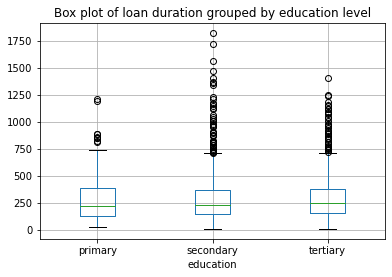

In [29]:
# Boxp lots of loan duration, grouped by the categorical attribute Education
df.boxplot(column='duration', by='education')
plt.title('Box plot of loan duration grouped by education level')
plt.suptitle("") 
plt.show()

By looking at box plots of loan duration versus education level we can see that the loan duration stays consistent between the three education levels. Most loans are between 1 and 750 days with the presence of some outliers. 

Interestingly, the number of outliers is greater for secondary and tertiary educated persons. 

In [40]:
long_duration_loans = df.where(df["duration"] >= 700, axis=0).dropna()

In [48]:
long_duration_loans.head()

age         job  marital  education default  balance housing loan  \
0   32.0  technician   single   tertiary      no    392.0     yes   no   
19  35.0  management   single   tertiary      no   4348.0     yes   no   
61  37.0  management  married  secondary      no   1180.0     yes  yes   
62  32.0    services   single   tertiary      no   1743.0     yes   no   
79  38.0    services  married  secondary      no   5000.0      no   no   

     contact  day month  duration  campaign  pdays  previous poutcome  \
0   cellular  1.0   apr     957.0       2.0  131.0       2.0  failure   
19  cellular  2.0   apr    1074.0       3.0  217.0       8.0  failure   
61  cellular  1.0   apr     786.0       1.0  135.0       1.0    other   
62  cellular  1.0   apr    1156.0       1.0  261.0       3.0    other   
79  cellular  4.0   dec     720.0       5.0  536.0       5.0  failure   

   subscribed  
0          no  
19         no  
61         no  
62         no  
79         no

In [42]:
long_duration_loans.describe()

age      balance        day     duration   campaign       pdays  \
count  65.000000    65.000000  65.000000    65.000000  65.000000   65.000000   
mean   46.276923  2128.461538  14.276923   932.384615   2.107692  190.753846   
std    16.291781  2472.334695   9.135281   211.707101   1.490837   90.308158   
min    23.000000     0.000000   1.000000   700.000000   1.000000    1.000000   
25%    34.000000   273.000000   6.000000   765.000000   1.000000  137.000000   
50%    43.000000  1180.000000  14.000000   880.000000   1.000000  183.000000   
75%    58.000000  3696.000000  22.000000  1047.000000   3.000000  224.000000   
max    84.000000  9367.000000  30.000000  1823.000000   7.000000  536.000000   

        previous  
count  65.000000  
mean    4.246154  
std     2.817528  
min     1.000000  
25%     2.000000  
50%     4.000000  
75%     5.000000  
max    12.000000

Out of 2000 persons, 65 of the loans have a duration of greater thgan or equal to 700 days. 

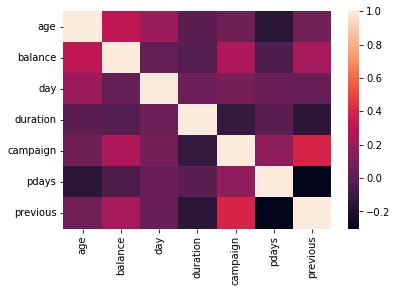

In [61]:
sns.heatmap(long_duration_loans.corr());

By looking at the correlation heatmap, we can see that there are no strong positive correlations in the outlier data with the possible exception of campaign and previous. It would be interesting to know the context of what these fields actually mean. Also, it would be preferable to have more data to work with as 65 samples is quite low. 

Below, I analyzed value counts per categorical column. This was to try to establish any link between a category and the duration of the loan. 

In [60]:
long_duration_loans.housing.value_counts()

no     49
yes    16
Name: housing, dtype: int64

In [45]:
long_duration_loans.education.value_counts()

secondary    30
tertiary     23
primary      12
Name: education, dtype: int64

In [49]:
long_duration_loans.job.value_counts()

management       17
retired          11
technician        7
services          6
unemployed        6
admin.            5
blue-collar       4
student           4
self-employed     2
entrepreneur      2
housemaid         1
Name: job, dtype: int64

In [55]:
long_duration_loans.poutcome.value_counts()

success    29
failure    27
other       9
Name: poutcome, dtype: int64

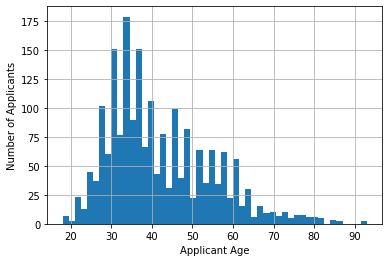

In [59]:
df['age'].hist(bins=50)
plt.xlabel('Applicant Age')
plt.ylabel('Number of Applicants')
plt.show()

The analysis shows that almost 75% of long duration persons have a housing value of no. 
The largest number of job types in these outliers belongs to management. 
Approximately 40% of persons have a poutcome of failure. 

It would be interesting to know what the fields actually mean. Currently it requires some guess work. 
Additionally a larger dataset would have potentially given a more statistically significant look at these long duration persons. 

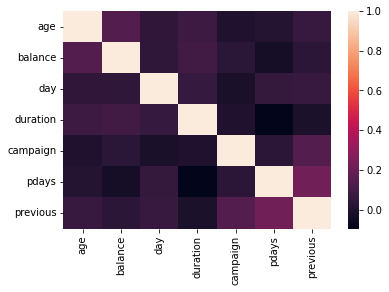

In [27]:
sns.heatmap(df.corr());